In [5]:
import gdown
import pandas as pd

# URL dari file Google Drive
url = 'https://drive.google.com/uc?id=1JJae2Dr6D95VDdd4NgexebVO2TL3_pXs'

# Unduh file
output = 'test.csv'
gdown.download(url, output, quiet=False)

# Baca file CSV
data = pd.read_csv(output)
print(data.head())

Downloading...
From: https://drive.google.com/uc?id=1JJae2Dr6D95VDdd4NgexebVO2TL3_pXs
To: /content/test.csv
100%|██████████| 1.91M/1.91M [00:00<00:00, 84.5MB/s]


   Employee ID  Age Gender  Years at Company    Job Role  Monthly Income  \
0        52685   36   Male                13  Healthcare            8029   
1        30585   35   Male                 7   Education            4563   
2        54656   50   Male                 7   Education            5583   
3        33442   58   Male                44       Media            5525   
4        15667   39   Male                24   Education            4604   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent             High            Average                     1   
1              Good             High            Average                     1   
2              Fair             High            Average                     3   
3              Fair        Very High               High                     0   
4              Good             High            Average                     0   

   ... Number of Dependents  Job Level Company Size Comp

In [6]:
import pandas as pd
import numpy as np

# Dropping rows with missing values
data_clean = data.dropna()

# Converting categorical variables to numeric for logistic regression
data_clean['Work-Life Balance'] = data_clean['Work-Life Balance'].map({'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4})
data_clean['Job Satisfaction'] = data_clean['Job Satisfaction'].map({'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4})
data_clean['Performance Rating'] = data_clean['Performance Rating'].map({'Low': 1, 'Average': 2, 'High': 3, 'Very High': 4})
data_clean['Attrition_Binary'] = data_clean['Attrition'].apply(lambda x: 1 if x == 'Left' else 0)


In [7]:
# Check the cleaned data
print("Cleaned Data Summary:")
print(data_clean.info())
print(data_clean['Work-Life Balance'].value_counts())
print(data_clean['Job Satisfaction'].value_counts())


Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               14900 non-null  int64  
 1   Age                       14900 non-null  int64  
 2   Gender                    14900 non-null  object 
 3   Years at Company          14900 non-null  int64  
 4   Job Role                  14900 non-null  object 
 5   Monthly Income            14900 non-null  int64  
 6   Work-Life Balance         14900 non-null  int64  
 7   Job Satisfaction          14900 non-null  int64  
 8   Performance Rating        12711 non-null  float64
 9   Number of Promotions      14900 non-null  int64  
 10  Overtime                  14900 non-null  object 
 11  Distance from Home        14900 non-null  int64  
 12  Education Level           14900 non-null  object 
 13  Marital Status            14900 non-nul

In [8]:
# Ensure no inf or NaN in the data used for logistic regression
data_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
data_clean.dropna(inplace=True)

# Descriptive statistics
desc_stats = data_clean.describe()
print("Descriptive Statistics:\n", desc_stats)


Descriptive Statistics:
         Employee ID           Age  Years at Company  Monthly Income  \
count  12711.000000  12711.000000      12711.000000    12711.000000   
mean   37169.279836     38.314216         15.583353     7298.058139   
std    21427.161278     12.066336         11.115159     2154.539407   
min        7.000000     18.000000          1.000000     1253.000000   
25%    18584.500000     28.000000          7.000000     5650.500000   
50%    37185.000000     38.000000         13.000000     7344.000000   
75%    55672.500000     49.000000         23.000000     8865.000000   
max    74465.000000     59.000000         51.000000    14707.000000   

       Work-Life Balance  Job Satisfaction  Performance Rating  \
count       12711.000000      12711.000000        12711.000000   
mean            2.598851          2.795453            2.176383   
std             0.941463          0.876935            0.517708   
min             1.000000          1.000000            1.000000   
25%  

In [9]:
from scipy.stats import chi2_contingency

# Chi-square tests for categorical variables
attrition_by_gender = pd.crosstab(data_clean['Gender'], data_clean['Attrition'])
chi2_gender, p_gender, _, _ = chi2_contingency(attrition_by_gender)

attrition_by_job_role = pd.crosstab(data_clean['Job Role'], data_clean['Attrition'])
chi2_job_role, p_job_role, _, _ = chi2_contingency(attrition_by_job_role)

attrition_by_work_life_balance = pd.crosstab(data_clean['Work-Life Balance'], data_clean['Attrition'])
chi2_work_life_balance, p_work_life_balance, _, _ = chi2_contingency(attrition_by_work_life_balance)

attrition_by_job_satisfaction = pd.crosstab(data_clean['Job Satisfaction'], data_clean['Attrition'])
chi2_job_satisfaction, p_job_satisfaction, _, _ = chi2_contingency(attrition_by_job_satisfaction)

print("\nChi-Square Test Results:")
print(f"Gender vs Attrition: chi2 = {chi2_gender}, p = {p_gender}")
print(f"Job Role vs Attrition: chi2 = {chi2_job_role}, p = {p_job_role}")
print(f"Work-Life Balance vs Attrition: chi2 = {chi2_work_life_balance}, p = {p_work_life_balance}")
print(f"Job Satisfaction vs Attrition: chi2 = {chi2_job_satisfaction}, p = {p_job_satisfaction}")



Chi-Square Test Results:
Gender vs Attrition: chi2 = 117.75983065336985, p = 1.957070115323069e-27
Job Role vs Attrition: chi2 = 11.702313041718874, p = 0.019707834189923255
Work-Life Balance vs Attrition: chi2 = 533.9354989550424, p = 2.1080219383714954e-115
Job Satisfaction vs Attrition: chi2 = 104.77655966806968, p = 1.4595482877784008e-22


In [10]:
from scipy.stats import ttest_ind

# T-tests for numerical variables
income_left = data_clean[data_clean['Attrition'] == 'Left']['Monthly Income']
income_stayed = data_clean[data_clean['Attrition'] == 'Stayed']['Monthly Income']
t_stat_income, p_value_income = ttest_ind(income_left, income_stayed)

years_left = data_clean[data_clean['Attrition'] == 'Left']['Years at Company']
years_stayed = data_clean[data_clean['Attrition'] == 'Stayed']['Years at Company']
t_stat_years, p_value_years = ttest_ind(years_left, years_stayed)

print("\nT-Test Results:")
print(f"Monthly Income vs Attrition: t-stat = {t_stat_income}, p = {p_value_income}")
print(f"Years at Company vs Attrition: t-stat = {t_stat_years}, p = {p_value_years}")



T-Test Results:
Monthly Income vs Attrition: t-stat = -0.4701174599568766, p = 0.6382791672685506
Years at Company vs Attrition: t-stat = -7.466043126763182, p = 8.802626245752287e-14


In [11]:
import statsmodels.api as sm

# Logistic regression model
X = data_clean[['Age', 'Years at Company', 'Monthly Income', 'Job Satisfaction', 'Work-Life Balance', 'Performance Rating']]
y = data_clean['Attrition_Binary']
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Summary of logistic regression
logit_summary = result.summary2().tables[1]
print("\nLogistic Regression Summary:\n", logit_summary)


Optimization terminated successfully.
         Current function value: 0.669572
         Iterations 4

Logistic Regression Summary:
                        Coef.  Std.Err.          z          P>|z|    [0.025  \
const               1.449931  0.139019  10.429719   1.814244e-25  1.177459   
Age                -0.005520  0.001773  -3.113942   1.846060e-03 -0.008994   
Years at Company   -0.009527  0.001936  -4.919989   8.654889e-07 -0.013322   
Monthly Income     -0.000003  0.000008  -0.370272   7.111796e-01 -0.000020   
Job Satisfaction    0.009521  0.020710   0.459760   6.456885e-01 -0.031068   
Work-Life Balance  -0.418965  0.019686 -21.282232  1.658557e-100 -0.457550   
Performance Rating -0.067438  0.035123  -1.920085   5.484714e-02 -0.136277   

                      0.975]  
const               1.722404  
Age                -0.002046  
Years at Company   -0.005731  
Monthly Income      0.000013  
Job Satisfaction    0.050111  
Work-Life Balance  -0.380381  
Performance Rating  0.001

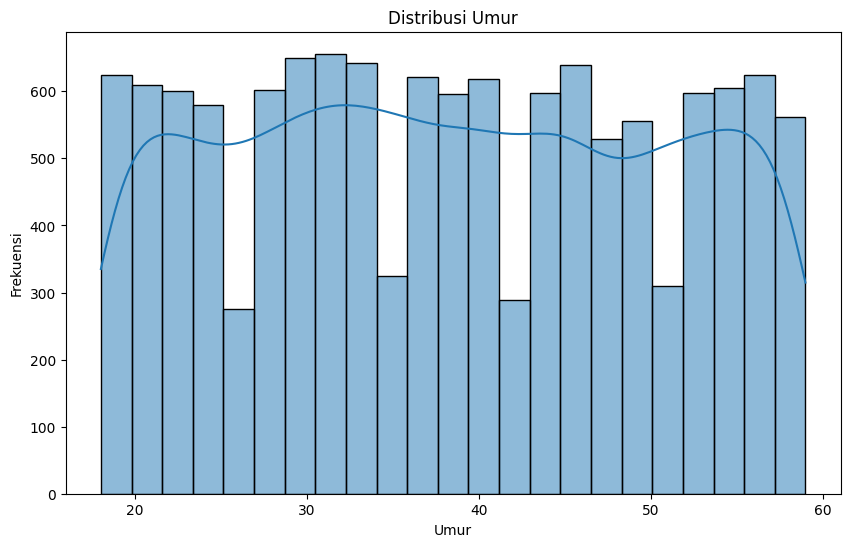

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Age'], kde=True)
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

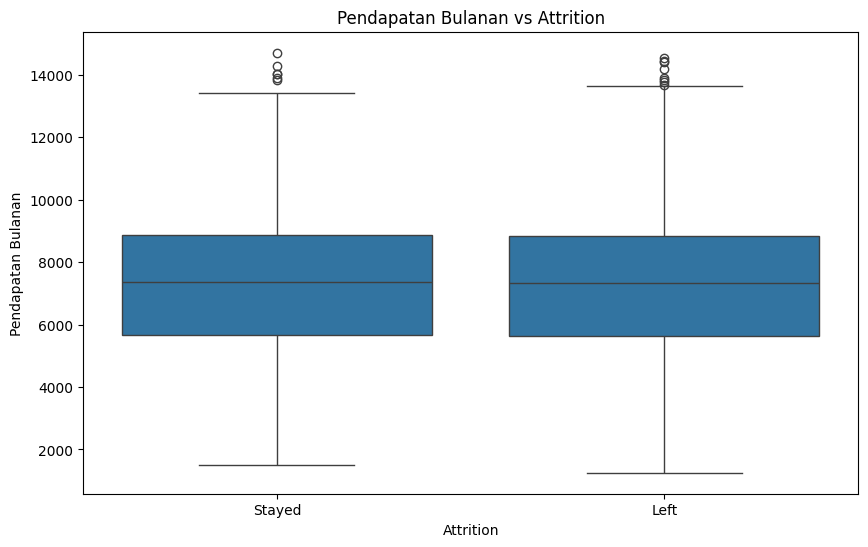

In [13]:
# Plot monthly income vs attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Monthly Income', data=data_clean)
plt.title('Pendapatan Bulanan vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Pendapatan Bulanan')
plt.show()
